<a href="https://colab.research.google.com/github/palak00007/ml-lab/blob/main/ml_lab_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Please upload the Excel file:


Saving Result-Experiment (2).xlsx to Result-Experiment (2).xlsx

 Dataset Preview (Before Cleaning):


,S. No.,Internal,External,Total,Grde,Internal.1,External.1,Total.1,Grde.1,External.2,Total.2,Grde.2
0,1,37,36,73,F,25.5,28,53.5,C,36,36,B+
1,2,61,75,136,B+,30.5,38,68.5,B+,41,41,A
2,3,50,48,98,C,27,32,59,B,37,37,B+
3,4,57,48,105,C,33,38,71,B+,37,37,B+
4,5,92,82,174,A+,41,40,81,A,40,40,A



 Column Names After Fix:
Index(['S. No.', 'Internal', 'External', 'Total', 'Grde', 'Internal.1',
       'External.1', 'Total.1', 'Grde.1', 'External.2', 'Total.2', 'Grde.2'],
      dtype='object')

 Model Coefficients: [1. 1.]
 Model Intercept: 2.842170943040401e-14
 Model Score (R² Value): 1.0

 Predicted ML Lab Marks for Internal=18 & External=40: 58.00


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


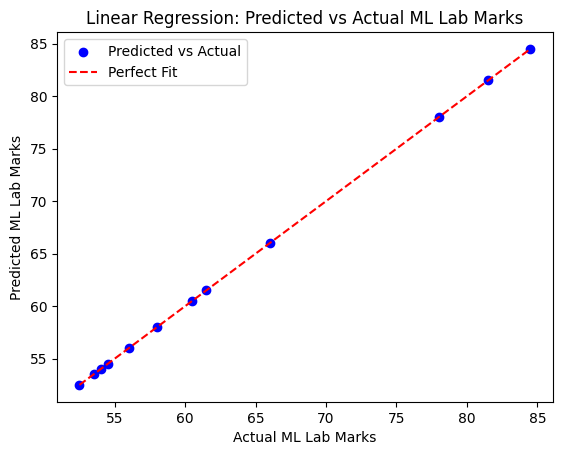

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from google.colab import files


print(" Please upload the Excel file:")
uploaded = files.upload()

file_name = list(uploaded.keys())[0]

df = pd.read_excel(file_name, skiprows=1)

print("\n Dataset Preview (Before Cleaning):")
display(df.head())

print("\n Column Names After Fix:")
print(df.columns)

df = df.rename(columns={'Internal.1': 'Internal_ML_Lab', 'External.1': 'External_ML_Lab', 'Total.1': 'ML_Lab'})

df['Internal_ML_Lab'] = pd.to_numeric(df['Internal_ML_Lab'], errors='coerce')
df['External_ML_Lab'] = pd.to_numeric(df['External_ML_Lab'], errors='coerce')
df['ML_Lab'] = pd.to_numeric(df['ML_Lab'], errors='coerce')

df = df.dropna()


X = df[['Internal_ML_Lab', 'External_ML_Lab']]
y = df['ML_Lab']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


print("\n Model Coefficients:", model.coef_)
print(" Model Intercept:", model.intercept_)
print(" Model Score (R² Value):", model.score(X_test, y_test))


new_student = np.array([[18, 40]])
predicted_value = model.predict(new_student)[0]
print(f"\n Predicted ML Lab Marks for Internal=18 & External=40: {predicted_value:.2f}")

plt.scatter(y_test, y_pred, color='blue', label="Predicted vs Actual")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='dashed', label="Perfect Fit")
plt.xlabel("Actual ML Lab Marks")
plt.ylabel("Predicted ML Lab Marks")
plt.title("Linear Regression: Predicted vs Actual ML Lab Marks")
plt.legend()
plt.show()